First Order Forward Derivative: [ 0.98363164  0.88734692  0.70420251  0.45212584  0.15579195 -0.15579195
 -0.45212584 -0.70420251 -0.88734692 -0.98363164         nan]
Second Order Central Derivative: [            nan  9.35489284e-01  7.95774715e-01  5.78164173e-01
  3.03958894e-01  1.76697482e-16 -3.03958894e-01 -5.78164173e-01
 -7.95774715e-01 -9.35489284e-01             nan]
First Order Forward Second Derivative: [-0.09628472 -0.18314442 -0.25207667 -0.29633389 -0.31158389 -0.29633389
 -0.25207667 -0.18314442 -0.09628472         nan         nan]
Second Order Central Second Derivative: [        nan -0.30648378 -0.58296679 -0.80238495 -0.94326008 -0.99180234
 -0.94326008 -0.80238495 -0.58296679 -0.30648378         nan]
Composite Trapezoidal Integral: 1.9835235375094544
Composite Simpson's Integral: 2.0001095173150043


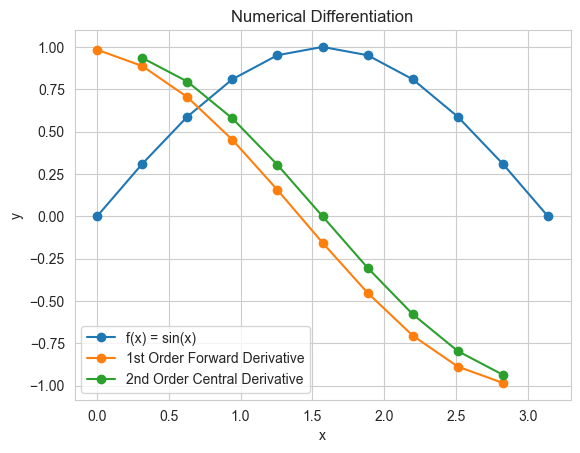

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Example function for differentiation and integration
def f(x):
    return np.sin(x)

# Numerical differentiation methods
def first_order_forward_difference(x, y):
    """First order forward finite difference for the first derivative"""
    h = np.diff(x)
    dy_dx = np.diff(y) / h
    return np.append(dy_dx, np.nan)  # Adding NaN for consistent length

def second_order_central_difference(x, y):
    """Second order central finite difference for the first derivative"""
    h = np.diff(x)
    dy_dx = (y[2:] - y[:-2]) / (2 * h[1:])
    dy_dx_full = np.append([np.nan], dy_dx)
    return np.append(dy_dx_full, np.nan)  # Adding NaNs at start and end for consistency

def first_order_forward_difference_second_derivative(x, y):
    """First order forward finite difference for the second derivative"""
    h = np.diff(x)
    d2y_dx2 = np.diff(np.diff(y)) / h[:-1]
    d2y_dx2_full = np.append(d2y_dx2, [np.nan, np.nan])
    return d2y_dx2_full  # Consistent length with added NaNs

def second_order_central_difference_second_derivative(x, y):
    """Second order central finite difference for the second derivative"""
    h = np.diff(x)
    d2y_dx2 = (y[2:] - 2 * y[1:-1] + y[:-2]) / (h[1:]**2)
    d2y_dx2_full = np.append([np.nan], d2y_dx2)
    return np.append(d2y_dx2_full, np.nan)  # Adding NaNs for consistent length

# Numerical integration methods
def composite_trapezoidal(x, y):
    """Composite Trapezoidal rule for integration"""
    h = np.diff(x)
    integral = np.sum(h * (y[:-1] + y[1:]) / 2)
    return integral

def composite_simpsons(x, y):
    """Composite Simpson's 1/3 rule for integration"""
    if len(x) % 2 == 0:
        raise ValueError("Simpson's rule requires an odd number of points.")

    h = (x[-1] - x[0]) / (len(x) - 1)
    integral = h / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2]))
    return integral

# Test data
x = np.linspace(0, np.pi, 11)  # Ensure an odd number of points for Simpson's rule
y = f(x)

# First derivative approximations
dy_dx1 = first_order_forward_difference(x, y)
dy_dx2 = second_order_central_difference(x, y)

# Second derivative approximations
d2y_dx2_1 = first_order_forward_difference_second_derivative(x, y)
d2y_dx2_2 = second_order_central_difference_second_derivative(x, y)

# Integrations
integral_trapezoidal = composite_trapezoidal(x, y)
integral_simpsons = composite_simpsons(x, y)

print("First Order Forward Derivative:", dy_dx1)
print("Second Order Central Derivative:", dy_dx2)
print("First Order Forward Second Derivative:", d2y_dx2_1)
print("Second Order Central Second Derivative:", d2y_dx2_2)

print("Composite Trapezoidal Integral:", integral_trapezoidal)
print("Composite Simpson's Integral:", integral_simpsons)

# Optional plotting
# Ensure NaNs are excluded when plotting to avoid shape mismatches
plt.plot(x, y, 'o-', label='f(x) = sin(x)')
plt.plot(x[~np.isnan(dy_dx1)], dy_dx1[~np.isnan(dy_dx1)], 'o-', label='1st Order Forward Derivative')
plt.plot(x[~np.isnan(dy_dx2)], dy_dx2[~np.isnan(dy_dx2)], 'o-', label='2nd Order Central Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Numerical Differentiation')
plt.show()


In [4]:
import numpy as np

# Data for the vehicle
t = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16])  # time in seconds
x = np.array([0, 0.7, 1.8, 3.4, 5.1, 6.3, 7.3, 8.0, 8.4])  # distance in meters

# Let's use second_order_central_difference to compute derivatives at internal points
# and first_order_forward_difference for boundary points (like t = 0)

# First derivative (velocity) and second derivative (acceleration)
dy_dx = second_order_central_difference(t, x)
d2y_dx2 = second_order_central_difference_second_derivative(t, x)

# For boundary cases, we might need to use forward finite differences
dy_dx_forward = first_order_forward_difference(t, x)
d2y_dx2_forward = first_order_forward_difference_second_derivative(t, x)

# To find the velocity and acceleration at given times, we need to identify the closest indices
# Considering velocity at t = 10 seconds
idx_10 = np.where(t == 10)[0][0]  # Find the index where t is 10
velocity_at_10 = dy_dx[idx_10]    # Central difference derivative at this index
acceleration_at_10 = d2y_dx2[idx_10]  # Central difference second derivative

# Considering velocity at t = 5 seconds
# As t = 5 is not in the list, let's interpolate
t_interp = np.interp(5, t, x)  # Find interpolated distance at t = 5

# Since this is a boundary value, use forward finite differences for derivative
velocity_at_5 = dy_dx_forward[2]  # The closest index after interpolation
acceleration_at_5 = d2y_dx2_forward[2]  # The closest index for acceleration

print(f"Velocity at t = 10s: {velocity_at_10:.2f} m/s")
print(f"Acceleration at t = 10s: {acceleration_at_10:.2f} m/s²")
print(f"Velocity at t = 5s: {velocity_at_5:.2f} m/s")
print(f"Acceleration at t = 5s: {acceleration_at_5:.2f} m/s²")


Velocity at t = 10s: 0.55 m/s
Acceleration at t = 10s: -0.05 m/s²
Velocity at t = 5s: 0.80 m/s
Acceleration at t = 5s: 0.05 m/s²


In [5]:
import numpy as np
import math

# Given data
x = np.array([0.6, 1.5, 1.6, 2.5, 3.5])  # time in seconds
f_x = np.array([0.9036, 0.3734, 0.3261, 0.08422, 0.01596])  # values of f(x)

# Numerical differentiation: Forward finite difference (first order)
# Derivative estimate using forward finite difference:
# f'(x_i) ≈ (f(x_{i+1}) - f(x_i)) / (x_{i+1} - x_i)
def forward_finite_difference(x, y):
    h = np.diff(x)
    dy_dx = np.diff(y) / h
    return dy_dx

# Get the numerical derivatives
numerical_derivatives = forward_finite_difference(x, f_x)

# Calculate the analytical derivatives to compare with numerical ones
def true_derivative(x):
    return np.exp(-2 * x) * (5 - 10 * x)

# Analytical derivatives
analytical_derivatives = true_derivative(x[:-1])  # We don't have enough data for the last point in forward differences

# Display the results
print("x =", x[:-1])
print("Numerical derivatives (forward finite difference):", numerical_derivatives)
print("Analytical derivatives:", analytical_derivatives)

# Compute the absolute error to see how well the numerical derivatives match the analytical ones
absolute_error = np.abs(numerical_derivatives - analytical_derivatives)
print("Absolute error:", absolute_error)


x = [0.6 1.5 1.6 2.5]
Numerical derivatives (forward finite difference): [-0.58911111 -0.473      -0.26875556 -0.06826   ]
Analytical derivatives: [-0.30119421 -0.49787068 -0.44838424 -0.13475894]
Absolute error: [0.2879169  0.02487068 0.17962869 0.06649894]


Composite Trapezoidal Integral: 335.9705324411173
Composite Simpson's 1/3 Integral: 335.9625298035534
Scipy Quad Integral: 335.9625300616258


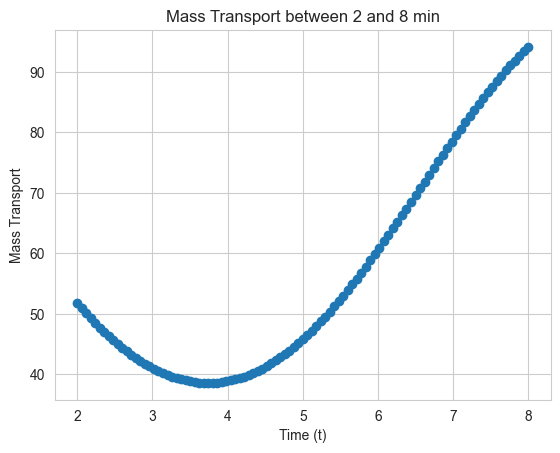

In [8]:
# Define the product of Q(t) and c(t)
def mass(t):
    return (9 + 5 * np.cos(0.4 * t)**2) * (5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t))

# Integration interval
t1 = 2
t2 = 8

# Correctly define t with an odd number of points
num_points = 101  # Make sure the total number of points is odd
t = np.linspace(t1, t2, num_points)
y = mass(t)  # Function to be integrated

# Re-run the integration methods with the corrected t array
trapezoidal_integral = composite_trapezoidal(t, y)  # Trapezoidal rule
simpsons_integral = composite_simpsons(t, y)  # Simpson's 1/3 rule
quad_integral, quad_error = quad(mass, t1, t2)  # Reference result with scipy's quad

# Display the results
print("Composite Trapezoidal Integral:", trapezoidal_integral)
print("Composite Simpson's 1/3 Integral:", simpsons_integral)
print("Scipy Quad Integral:", quad_integral)

# Optional visualization
plt.plot(t, y, 'o-', label='Q(t) * c(t)')
plt.xlabel('Time (t)')
plt.ylabel('Mass Transport')
plt.title('Mass Transport between 2 and 8 min')
plt.show()

In [9]:
# Define the function to be integrated
def f(x):
    return x * np.exp(-x)

# Exact value of the integral
exact_value = 1 - 2 / np.exp(1)  # This is derived mathematically

# Different numbers of subintervals to test
subintervals = [5, 10, 20, 50, 100]

# Empty lists to store results
trapezoidal_results = []
simpsons_results = []

# Loop through the number of subintervals and calculate the integrals
for n in subintervals:
    # Define the x array with the given number of subintervals
    x = np.linspace(0, 1, n + 1)
    y = f(x)

    # Trapezoidal rule
    trapezoidal_integral = composite_trapezoidal(x, y)
    trapezoidal_results.append(trapezoidal_integral)

    # Simpson's 1/3 rule (requires odd number of points)
    if (n + 1) % 2 != 0:
        simpsons_integral = composite_simpsons(x, y)
        simpsons_results.append(simpsons_integral)

# Use scipy's quad function for a reference value
quad_integral, quad_error = quad(f, 0, 1)

# Display the results
print("Exact Value:", exact_value)
print("Scipy Quad Integral:", quad_integral)

print("Composite Trapezoidal Results:")
for i, res in zip(subintervals, trapezoidal_results):
    print(f"  {i} subintervals: {res}")

print("Composite Simpson's 1/3 Results:")
for i, res in zip([s for s in subintervals if (s + 1) % 2 != 0], simpsons_results):
    print(f"  {i} subintervals: {res}")

Exact Value: 0.26424111765711533
Scipy Quad Integral: 0.26424111765711533
Composite Trapezoidal Results:
  5 subintervals: 0.2609128085131533
  10 subintervals: 0.26340809868507203
  20 subintervals: 0.2640328039768298
  50 subintervals: 0.26420778482693924
  100 subintervals: 0.2642327843552297
Composite Simpson's 1/3 Results:
  10 subintervals: 0.2642398620757116
  20 subintervals: 0.2642410390740825
  50 subintervals: 0.26424111564460595
  100 subintervals: 0.26424111753132656
